# Inaugural project

In [25]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from ExchangeEconomy import ExchangeEconomyClass

In [27]:
model = ExchangeEconomyClass()

# Question 1 - Pareto Improvement

In [28]:
par = model.par

In [29]:
N = 75
grid_x1A = np.linspace(0.0,1.0,N)
grid_x2A = np.linspace(0.0,1.0,N)

In [30]:
# Check the utility under intial endowments


print(f'initial utility A is {model.utility_A(model.par.w1A, model.par.w2A)}')
print(f'initial utility B is {model.utility_B((1-model.par.w1A), (1-model.par.w2A))}')

initial utility A is 0.41601676461038084
initial utility B is 0.30365889718756617


In [31]:
print(model.utility_A(4,2))

2.5198420997897464


In [32]:
#Create grids for utility values
N = 75
utility_gridA = np.zeros((N, N))  # Create a grid for utility values
utility_gridB = np.zeros((N, N))
grid_x1A = np.linspace(0.0, 1.0, N)
grid_x2A = np.linspace(0.0, 1.0, N)

# Create a meshgrid of x1A and x2A values
X1A, X2A = np.meshgrid(grid_x1A, grid_x2A)


# Compute utility for each combination of x1A and x2A
for i in range(N):
    for j in range(N):
        utility_gridA[i, j] = model.utility_A(X1A[i, j], X2A[i, j])
        utility_gridB[i, j] = model.utility_B((1 - X1A[i, j]), (1 - X2A[i, j]))

print(utility_gridA)
print(utility_gridB)
print(utility_gridB.shape)



[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01351351 0.01702596 ... 0.05621848 0.05647756 0.05673428]
 [0.         0.02145137 0.02702703 ... 0.08924128 0.08965253 0.09006005]
 ...
 [0.         0.23387831 0.2946682  ... 0.97297297 0.97745678 0.98189983]
 [0.         0.23603887 0.29739034 ... 0.98196126 0.98648649 0.99097058]
 [0.         0.23818958 0.30010007 ... 0.99090859 0.99547505 1.        ]]
[[1.         0.99097058 0.98189983 ... 0.09006005 0.05673428 0.        ]
 [0.99547505 0.98648649 0.97745678 ... 0.08965253 0.05647756 0.        ]
 [0.99090859 0.98196126 0.97297297 ... 0.08924128 0.05621848 0.        ]
 ...
 [0.30010007 0.29739034 0.2946682  ... 0.02702703 0.01702596 0.        ]
 [0.23818958 0.23603887 0.23387831 ... 0.02145137 0.01351351 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(75, 75)


In [33]:
# Compute utility of the initial endowment
initial_utilityA = model.utility_A(par.w1A, par.w2A)
initial_utilityB = model.utility_B((1 - par.w1A), (1 - par.w2A))

# Create set C: Checking for pareto improvements
C_Grid = ((utility_gridA >= initial_utilityA) & (utility_gridB >= initial_utilityB)).astype(int)

print(C_Grid)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


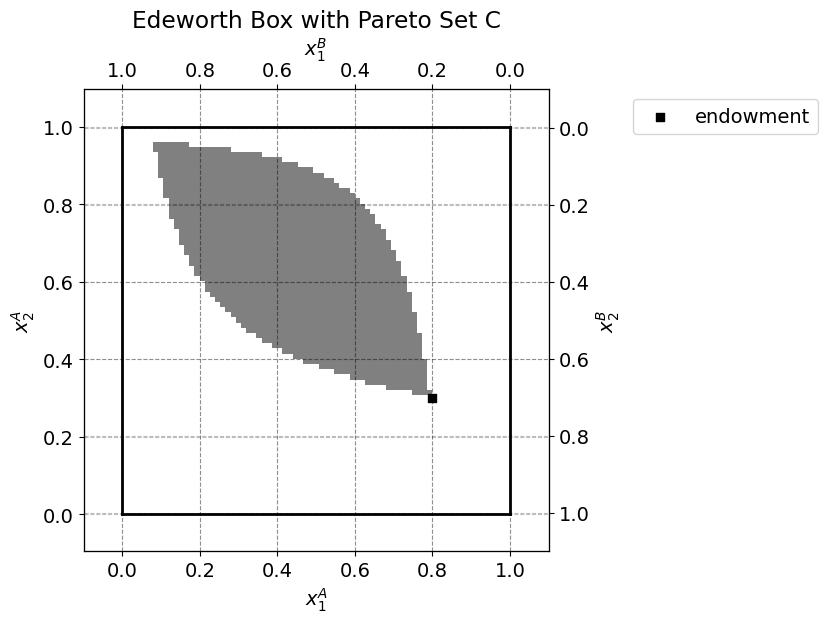

In [34]:
# Plot the Edgeworth box and overlay C_Grid
w1bar = 1.0
w2bar = 1.0
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot the binary grid C_Grid
ax_A.imshow(C_Grid, extent=[0, w1bar, 0, w2bar], origin='lower', cmap='binary', alpha=0.5)

# Scatter plot for the endowment
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='endowment')

# limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.title('Edeworth Box with Pareto Set C')
plt.show()


# Question 2: Error in market clearing

error in market clearing condition for p1=0.5: eps1=  0.53333333, eps2= -0.26666667
error in market clearing condition for p1=0.5266666666666666: eps1=  0.47594937, eps2= -0.25066667
error in market clearing condition for p1=0.5533333333333333: eps1=  0.42409639, eps2= -0.23466667
error in market clearing condition for p1=0.58: eps1=  0.37701149, eps2= -0.21866667
error in market clearing condition for p1=0.6066666666666667: eps1=  0.33406593, eps2= -0.20266667
error in market clearing condition for p1=0.6333333333333333: eps1=  0.29473684, eps2= -0.18666667
error in market clearing condition for p1=0.66: eps1=  0.25858586, eps2= -0.17066667
error in market clearing condition for p1=0.6866666666666666: eps1=  0.22524272, eps2= -0.15466667
error in market clearing condition for p1=0.7133333333333334: eps1=  0.19439252, eps2= -0.13866667
error in market clearing condition for p1=0.74: eps1=  0.16576577, eps2= -0.12266667
error in market clearing condition for p1=0.7666666666666666: eps1=

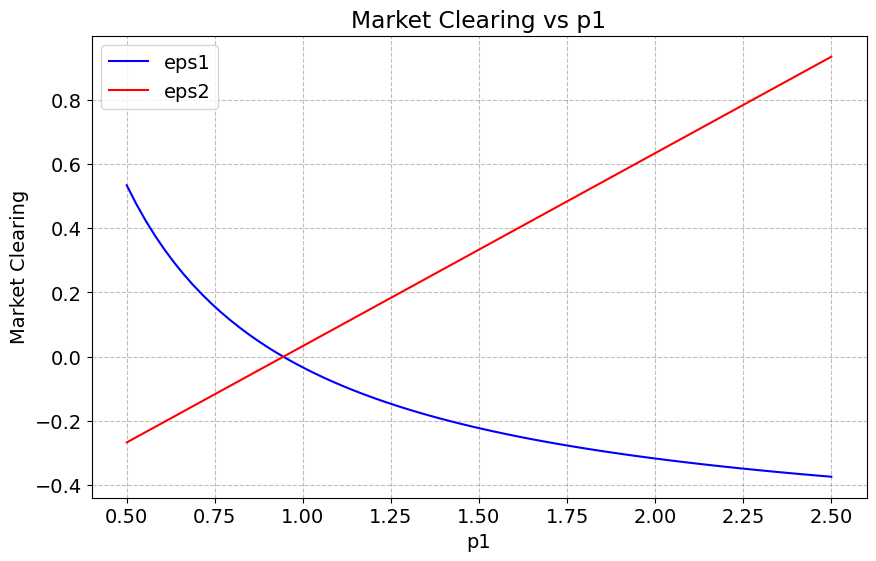

In [35]:
pN = 100  # Number of grid points (N)
p1_grid = np.zeros(76)
for i in range(76):
    p1_grid[i] = 0.5 + 2 * i / 75
grid_mkt_clearing = np.zeros((pN, 2))  # Creating a 2D array to store eps1 and eps2

for index, value in enumerate(p1_grid):
    eps1, eps2 = model.check_market_clearing(value)
    grid_mkt_clearing[index] = eps1, eps2  # Storing eps1 and eps2 separately
    print(f'error in market clearing condition for p1={value}: eps1={eps1:12.8f}, eps2={eps2:12.8f}')

plt.figure(figsize=(10, 6))
plt.plot(p1_grid[:76], grid_mkt_clearing[:76, 0], label='eps1', color='blue')
plt.plot(p1_grid[:76], grid_mkt_clearing[:76, 1], label='eps2', color='red')
plt.xlabel('p1')
plt.ylabel('Market Clearing')
plt.legend()
plt.title('Market Clearing vs p1')
plt.show()

# Question 3 - Market Clearing price

In [36]:
pN = 76
p1_grid = np.zeros(76)
for i in range(76):
    p1_grid[i] = 0.5 + 2 * i / 75
grid_mkt_clearing = np.zeros((pN, 2))  # Creating a 2D array to store eps1 and eps2

tolerance = 0.01  # Define a tolerance level for closeness to zero

for index, value in enumerate(p1_grid):
    eps1, eps2 = model.check_market_clearing(value)
    grid_mkt_clearing[index] = eps1, eps2  # Storing eps1 and eps2 separately
    #print(f'excess demand for p1={value}: eps1={eps1:12.8f}, eps2={eps2:12.8f}')
    
    # Check if both eps1 and eps2 are close to zero
    if abs(eps1) < tolerance and abs(eps2) < tolerance:
        print(f'market clearing price: {value}')

market clearing price: 0.9533333333333334


# Question 4a

It seems that we need to constrain the problem so that $x_1^B = 1 - x_1^A$ and $x_2^B = 1 - x_2^A$ like in set C. 

Notice that at the lower bound of 0.5, there is negative $x_1^A$. So the lower bound is adjusted slightly higher to 0.54, to ensure the optimiser doesn't find a corner solution.

In [37]:
pN = 100
p1_grid = np.linspace(0.54, 2.5, pN) # Change lower bound slightly for positive consumption
grid_mkt = np.zeros(pN)  # Creating a 2D array to store utility values

for index, value in enumerate(p1_grid):
    # Compute utility for each p value
    x1B, x2B = model.demand_B(value)
    utility = model.utility_A(x1A=1-x1B, x2A=1-x2B)
    grid_mkt[index] = utility  # Storing utility 

# Print the utility values
print("Utility values:")
print(grid_mkt)

# Check if there are any NaN values
if np.isnan(grid_mkt).any():
    print("There are NaN values in utility.")
else:
    # Print the maximum utility value
    print(f'Maximum utility is {np.max(grid_mkt)}')


Utility values:
[0.10964644 0.25997822 0.3194545  0.35966839 0.39030238 0.41501922
 0.4356591  0.45329623 0.4686198  0.4821018  0.49408134 0.50481113
 0.51448503 0.52325529 0.53124378 0.53854969 0.54525484 0.55142758
 0.55712556 0.56239785 0.56728661 0.57182826 0.57605453 0.57999317
 0.58366863 0.5871025  0.59031401 0.59332027 0.59613664 0.5987769
 0.60125349 0.60357766 0.60575961 0.60780861 0.60973314 0.61154093
 0.61323907 0.61483406 0.61633189 0.61773808 0.61905772 0.62029553
 0.62145587 0.6225428  0.62356008 0.62451123 0.62539951 0.62622796
 0.62699945 0.62771664 0.62838202 0.62899795 0.62956661 0.63009009
 0.63057032 0.63100913 0.63140826 0.63176933 0.63209388 0.63238337
 0.63263917 0.63286258 0.63305483 0.63321711 0.63335051 0.63345608
 0.63353484 0.63358774 0.63361567 0.6336195  0.63360006 0.63355812
 0.63349443 0.63340971 0.63330463 0.63317985 0.63303598 0.63287363
 0.63269335 0.6324957  0.63228119 0.63205033 0.63180359 0.63154143
 0.63126429 0.6309726  0.63066677 0.63034717 0.

In [38]:
pN = 75
p1_grid = np.linspace(0.54, 2.5, pN) # Change lower bound slightly for positive consumption
grid_mkt = np.zeros(pN)  # Creating a 2D array to store utility values

for index, value in enumerate(p1_grid):
    # Compute utility for each p value
    x1B, x2B = model.demand_B(value)
    utility = model.utility_A(x1A=1-x1B, x2A=1-x2B)
    grid_mkt[index] = utility  # Storing utility 

# Print the utility values
#print("Utility values:")
print(grid_mkt)

# Check if there are any NaN values
if np.isnan(grid_mkt).any():
    print("There are NaN values in utility.")
else:
    # Print the maximum utility value
    max_utility = np.max(grid_mkt)
    print(f'Maximum utility is {max_utility}')

    # Find the index of the maximum utility value
    max_utility_index = np.argmax(grid_mkt)

    # Get the corresponding price
    optimal_p = p1_grid[max_utility_index]

    # Compute the allocations of x1A, x2A, x1B, and x2B
    x1B, x2B = model.demand_B(optimal_p)
    x1A = 1 - x1B
    x2A = 1 - x2B

    # Print the results
    print(f'Optimal price: {optimal_p}')
    print(f'Optimal utility level: {max_utility}')
    print(f'Allocation of x1A: {x1A}')
    print(f'Allocation of x2A: {x2A}')
    print(f'Allocation of x1B: {x1B}')
    print(f'Allocation of x2B: {x2B}')

    # Save allocation for later plot
    p1_set_optimal = (x1A, x2A)


[0.10964644 0.28347501 0.34794587 0.39067039 0.42266953 0.44808912
 0.46900662 0.48663196 0.50173932 0.51485725 0.52636411 0.53654072
 0.54560156 0.55371426 0.56101237 0.56760403 0.57357798 0.57900794
 0.58395577 0.5884739  0.59260705 0.59639373 0.59986726 0.60305667
 0.60598737 0.60868175 0.61115959 0.61343844 0.61553397 0.61746019
 0.61922967 0.62085374 0.62234262 0.62370557 0.62495102 0.62608663
 0.62711937 0.62805566 0.62890133 0.62966179 0.63034197 0.63094645
 0.63147944 0.63194483 0.63234625 0.63268703 0.63297029 0.63319893
 0.63337566 0.63350297 0.63358324 0.63361865 0.63361127 0.63356303
 0.63347573 0.63335108 0.63319068 0.63299604 0.63276856 0.63250959
 0.63222039 0.63190215 0.63155599 0.63118298 0.63078413 0.63036039
 0.62991267 0.62944183 0.62894868 0.62843399 0.62789852 0.62734294
 0.62676794 0.62617415 0.62556216]
Maximum utility is 0.6336186512596976
Optimal price: 1.8908108108108108
Optimal utility level: 0.6336186512596976
Allocation of x1A: 0.6198589670287784
Allocatio

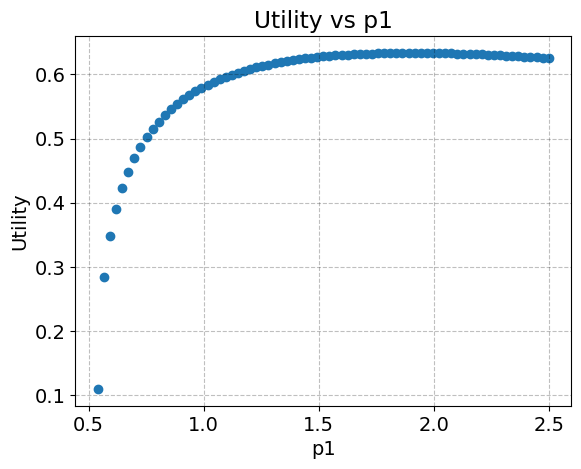

In [39]:
# Plot the utility values
plt.scatter(p1_grid, grid_mkt)
plt.xlabel('p1')
plt.ylabel('Utility')
plt.title('Utility vs p1')
plt.grid(True)
plt.show()

# Question 4B - Analytic Solution



This problem needs to be constrained to ensure strictly non-negative consumption and utility. I use the bounds $p_1 \in [0,5]$ and I find (approximately) the same maximum as in 4a. 

In [40]:
from scipy.optimize import minimize_scalar

# Define the objective function to maximize (utility function)
def objective_function(p):
    # Compute the utility for a given p value
    utility = model.utility_A(1 - model.demand_B(p)[0], 1 - model.demand_B(p)[1])
    return -utility  # We use negative utility because minimize_scalar minimizes by default

# Perform scalar optimization to find the optimal p value
result = minimize_scalar(objective_function, bounds=(0, 5), method='bounded')

# Get the optimal p value
optimal_p = result.x
optimal_utility = -result.fun  # Utility is negative because we used -utility in the objective function

print(f'Optimal p value for maximum utility: {optimal_p}')
print(f'Maximum utility: {optimal_utility}')


Optimal p value for maximum utility: 1.8993456159390096
Maximum utility: 0.6336208506936474


In [41]:
# Compute the allocation of x1A, x2A, x1B, and x2B for the optimal p value
x1A = 1 - model.demand_B(optimal_p)[0]
x2A = 1 - model.demand_B(optimal_p)[1]
x1B = model.demand_B(optimal_p)[0]
x2B = model.demand_B(optimal_p)[1]

print(f'Allocation of x1A: {x1A}')
print(f'Allocation of x2A: {x2A}')
print(f'Allocation of x1B: {x1B}')
print(f'Allocation of x2B: {x2B}')

# Save allocation for later plot
positive_price_analytic_optimal = (x1A, x2A)


Allocation of x1A: 0.6209680098500909
Allocation of x2A: 0.640043625604066
Allocation of x1B: 0.3790319901499091
Allocation of x2B: 0.3599563743959339


# Question 5a: 


In [42]:
# Initialize variables to store the maximum utility A and corresponding x1A, x2A values
max_utility_A = -float('inf')
max_x1A = 0
max_x2A = 0

# Iterate over each point in the grid
for i in range(N):
    for j in range(N):
        # Check if the entry in set C is 1 (indicating Pareto improvement)
        if C_Grid[i, j] == 1:
            # Compute utility A for this point
            utilityA = model.utility_A(X2A[i, j], X1A[i, j])
            # Update maximum utility A and corresponding x1A, x2A values if this utility is higher
            if utilityA > max_utility_A:
                max_utility_A = utilityA
                max_x1A = grid_x1A[i]
                max_x2A = grid_x2A[j]

print(f"Maximum utility A with respect to Pareto improvements: {max_utility_A}")
print(f"Corresponding x1A: {max_x1A}")
print(f"Corresponding x2A: {max_x2A}")

# save for later plot
Pareto_grid_optimal = (max_x1A, max_x2A)

Maximum utility A with respect to Pareto improvements: 0.6936645690651707
Corresponding x1A: 0.7027027027027027
Corresponding x2A: 0.6891891891891893


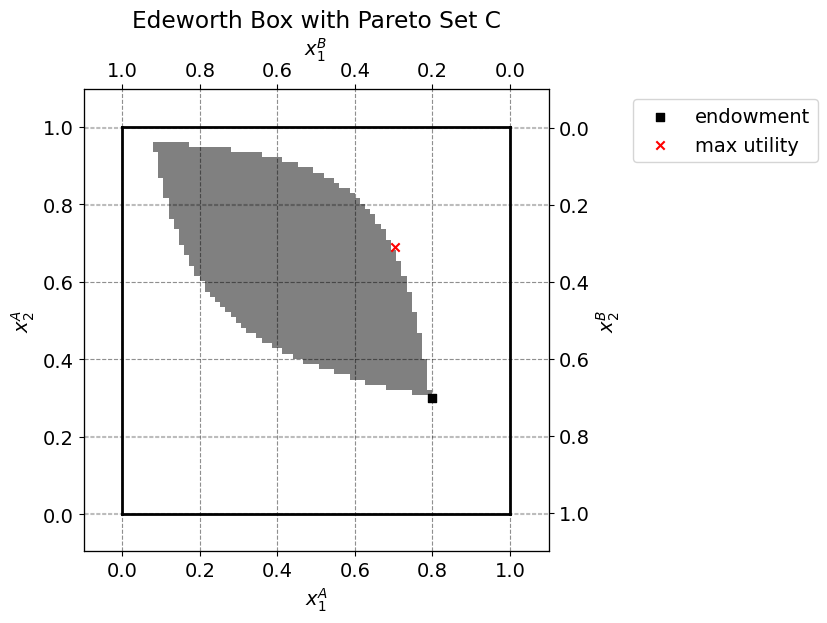

In [43]:
# Plot the Edgeworth box where C is market-maker...
w1bar = 1.0
w2bar = 1.0
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot the binary grid C_Grid
ax_A.imshow(C_Grid, extent=[0, w1bar, 0, w2bar], origin='lower', cmap='binary', alpha=0.5)

# Show the endowment and utility max 
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='endowment')
ax_A.scatter(max_x1A, max_x2A, marker='x', color='red', label='max utility')

# limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.title('Edeworth Box with Pareto Set C')
plt.show()

# Question 5B

In [44]:
from scipy.optimize import minimize
# Define the objective function to maximize utility for agent A
def objective_function(x):
    x1A, x2A = x
    utility_A = model.utility_A(x1A, x2A)
    return -utility_A  # We use negative utility because we are maximizing

# Define the constraint function
def constraint_function(x):
    x1A, x2A = x
    traded_utility_B = model.utility_B(1 - x1A, 1 - x2A)
    endowment_utility_B = model.utility_B(1-par.w1A, 1-par.w2A)
    constraint_value = traded_utility_B - endowment_utility_B
    return constraint_value

# Define bounds for x1A and x2A (between 0 and 1)
bounds = [(0, 1), (0, 1)]

# Initial guess for x1A and x2A
initial_guess = [0.5, 0.5]

# Perform constrained optimization to find the optimal x1A and x2A values
result = minimize(objective_function, x0=initial_guess, bounds=bounds, constraints={'type': 'ineq', 'fun': constraint_function}, method='SLSQP')

# Get the optimal x1A and x2A values
optimal_x1A, optimal_x2A = result.x
optimal_utility = -result.fun  # Utility is negative because we used -utility in the objective function

print(f'Optimal x1A value for maximum utility: {optimal_x1A}')
print(f'Optimal x2A value for maximum utility: {optimal_x2A}')
print(f'Maximum utility: {optimal_utility}')

#save for later plot
Pareto_analytic_optimal = (optimal_x1A, optimal_x2A)


Optimal x1A value for maximum utility: 0.6808707634813329
Optimal x2A value for maximum utility: 0.7250682826336569
Maximum utility: 0.7100258610697728


# Question 6A - Utilitarianism

In [45]:
from scipy.optimize import minimize
# Define the objective function to maximize aggregate utility
def objective_function(x):
    x1A, x2A = x
    utility_A = model.utility_A(x1A, x2A) + model.utility_B(1 - x1A, 1 - x2A)
    return -utility_A  # We use negative utility because we are maximizing


# Define bounds for x1A and x2A (between 0 and 1)
bounds = [(0, 1), (0, 1)]

# Initial guess for x1A and x2A
initial_guess = [0.5, 0.5]

# Perform constrained optimization to find the optimal x1A and x2A values
result = minimize(objective_function, x0=initial_guess, bounds=bounds, method='SLSQP')

# Get the optimal x1A and x2A values
optimal_x1A, optimal_x2A = result.x
optimal_utility = -result.fun  # Utility is negative because we used -utility in the objective function

print(f'Optimal x1A value for maximum utility: {optimal_x1A}')
print(f'Optimal x2A value for maximum utility: {optimal_x2A}')
print(f'Optimal x1B value for maximum utility: {1-optimal_x1A}')
print(f'Optimal x2B value for maximum utility: {1-optimal_x2A}')
print(f'Maximum aggregate utility: {optimal_utility}')

#save for later plot
utilitarian_optimal = (optimal_x1A, optimal_x2A)


Optimal x1A value for maximum utility: 0.33341166147388446
Optimal x2A value for maximum utility: 0.6665883190561481
Optimal x1B value for maximum utility: 0.6665883385261155
Optimal x2B value for maximum utility: 0.3334116809438519
Maximum aggregate utility: 1.0582673533675457


# Question 6b - Qualitative comparisons

We should discuss this in a few words...

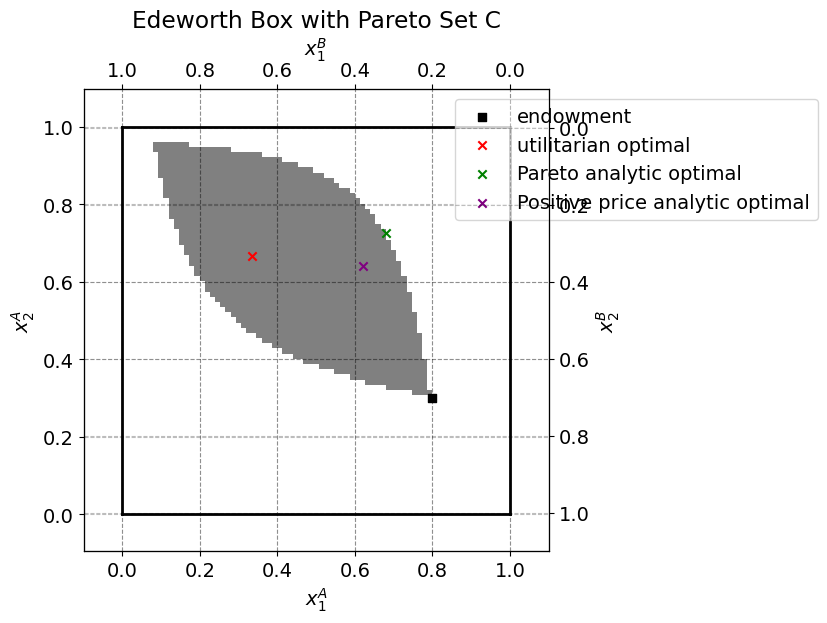

In [46]:
# Plot the Edgeworth box across different allocations
w1bar = 1.0
w2bar = 1.0
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot the binary grid C_Grid
ax_A.imshow(C_Grid, extent=[0, w1bar, 0, w2bar], origin='lower', cmap='binary', alpha=0.5)

# Show the endowment and various allocations
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='endowment')
ax_A.scatter(utilitarian_optimal[0], utilitarian_optimal[1], marker='x', color='red', label='utilitarian optimal')
ax_A.scatter(Pareto_analytic_optimal[0], Pareto_analytic_optimal[1], marker='x', color='green', label='Pareto analytic optimal')
ax_A.scatter(positive_price_analytic_optimal[0], positive_price_analytic_optimal[1], marker='x', color='purple', label='Positive price analytic optimal')

# limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.title('Edeworth Box with Pareto Set C')
plt.show()

# Question 7 - Uniform Distribution

In [47]:
# Generate random endowments
np.random.seed(79) # for reproductivity
num_elements = 50
W = np.random.uniform(0, 1, size=(num_elements, 2))
print(W)
print(len(W))

[[0.50066813 0.46806743]
 [0.50078253 0.14917817]
 [0.82027794 0.32136403]
 [0.779174   0.81508031]
 [0.01480228 0.22757973]
 [0.71173158 0.8211129 ]
 [0.79332548 0.49521599]
 [0.5605747  0.51493077]
 [0.28701333 0.1880898 ]
 [0.34100564 0.26630933]
 [0.20280882 0.40766757]
 [0.52124456 0.00845287]
 [0.96314435 0.86047428]
 [0.79002482 0.75214377]
 [0.93918236 0.98422348]
 [0.08506934 0.53264631]
 [0.75585188 0.31033795]
 [0.69176859 0.1953525 ]
 [0.85420114 0.43808778]
 [0.63458064 0.27903955]
 [0.67519836 0.38388312]
 [0.21280323 0.16899291]
 [0.44198113 0.92413407]
 [0.79058067 0.32221451]
 [0.00458459 0.6882265 ]
 [0.64427878 0.40004609]
 [0.00424253 0.57517566]
 [0.22379096 0.85624201]
 [0.79852453 0.73290709]
 [0.88415779 0.56409771]
 [0.65536917 0.0599099 ]
 [0.80498216 0.78534319]
 [0.95645391 0.47396311]
 [0.7266652  0.67998362]
 [0.66838163 0.05300448]
 [0.60875345 0.33373527]
 [0.93682441 0.00884742]
 [0.92769416 0.21523187]
 [0.54033703 0.49797325]
 [0.65437884 0.76614741]


# Question 8 - Market Equilibrium...
I think they want us to loop through all the endowments, then check if there is market clearing...

C:\Users\joshu\AppData\Local\Temp\ipykernel_22388\3397194343.py:13: RuntimeWarning: divide by zero encountered in divide
  return par.alpha * (p1*omegaA1 + omegaA2) / p1
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


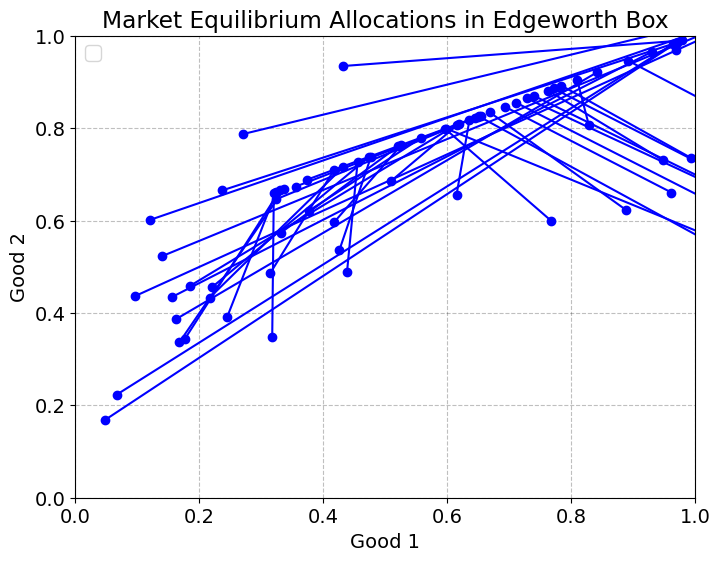

In [49]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

#Endowment space of previous exercise
np.random.seed(79) # for reproductivity
num_elements = 50
W = np.random.uniform(0, 1, size=(num_elements, 2))

# Demand functions
#Redefining the demand functrion as the endowment i now random
def xA1_star(p1, omegaA1, omegaA2):
    return par.alpha * (p1*omegaA1 + omegaA2) / p1

def xA2_star(p1, omegaA1, omegaA2):
    return (1 - par.alpha) * (p1*omegaA1 + omegaA2) 

def xB1_star(p1, omegaA1, omegaA2):
    return par.beta * ((1 - p1)*omegaA1 + omegaA2)

def xB2_star(p1, omegaA1, omegaA2):
    return (1 - par.beta) * ((1 - p1)*omegaA1 + omegaA2)


# Function to calculate market clearing errors
#The function is now modified to take the endowment space in account.
def market_clearing_error(p1, omegaA1, omegaA2):
    error1 = xA1_star(p1, omegaA1, omegaA2) - omegaA1 - xB1_star(p1, 1-omegaA1, 1-omegaA2)
    error2 = xA2_star(p1, omegaA1, omegaA2) - omegaA2 - xB2_star(p1, 1-omegaA1, 1-omegaA2)
    return abs(error1) + abs(error2)

# Function to find market clearing price
# The market error function is minimized to find the market clearing price
# The used method is L-BFGS-B it is a bounded method with the constriant that the price should be positive
def market_clearing_price(omegaA1, omegaA2):
    result = minimize(market_clearing_error, x0=0.5, args=(omegaA1, omegaA2), bounds=[(0, None)], method='L-BFGS-B')
    if result.success:
        return result.x[0]
    return None

# Find market equilibrium allocation for each omegaA in W and plot in Edgeworth box
plt.figure(figsize=(8, 6))
plt.title('Market Equilibrium Allocations in Edgeworth Box')

for omegaA in W:
    p1_eq = market_clearing_price(omegaA[0], omegaA[1]) # omegaA[0] is omegaA1 and omegaA[1] is omegaA2 it is based on W
    if p1_eq is not None:
        xA1_eq = xA1_star(p1_eq, omegaA[0], omegaA[1]) # calculates the optimal allocation of agent A of good 1
        xA2_eq = xA2_star(p1_eq, omegaA[0], omegaA[1]) # calculates the optimal allocation of agent A of good 2
        xB1_eq = xB1_star(p1_eq, 1-omegaA[0], 1-omegaA[1])
        xB2_eq = xB2_star(p1_eq, 1-omegaA[0], 1-omegaA[1])
    
        plt.plot([xA1_eq, 1-xB1_eq], [xA2_eq, 1-xB2_eq], 'bo-') #plots the consumtion bundels and connects them with a blue line


plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()
